# AIG 100 – Project 2: Regression and Classification Methods


#PART 1: REGRESSION

##1. Dataset Selection and Objective Definition

###1.1. Dataset Selection
For Regression, I chose Insurance dataset from Kaggle. This dataset contains information on insurance policyholders in the US, with the following features:

* age: Age of the primary beneficiary

* sex: Insurance contractor gender, female or male

* bmi: Body mass index, providing an understanding of body weight that is relatively independent of height

* children: Number of children covered by health insurance / number of dependents

* smoker: Smoking status

* region: The beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* charges: Individual medical costs billed by health insurance

The dataset comprises 1,338 entries, suggesting a substantial amount of data to work with for the regression analysis.

###1.2. Objective
To predict the insurance charges (charges) for individuals based on their age, sex, BMI, number of children, smoking status, and region.

###Loading the data

In [2]:
import pandas as pd

insurance_df = pd.read_csv('insurance.csv')

insurance_df.head(), insurance_df.describe()

(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

##2. Data Preprocessing

###2.1. Cleaning the Data

In [3]:
missing_values = insurance_df.isnull().sum()

# Identify outliers in 'charges' using IQR
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((insurance_df['charges'] < (Q1 - 1.5 * IQR)) | (insurance_df['charges'] > (Q3 + 1.5 * IQR))).sum()

missing_values, outliers

(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
 139)

* **Missing Values:** There are no missing values in the dataset, so no imputation or removal of missing data is necessary.
* **Outliers:** I have identified 139 outliers in the charges column based on the IQR method. Given the context of medical charges, outliers might represent legitimate variations in medical costs due to various treatments. Therefore, I will retain these outliers rather than removing them, as they could represent important patterns in the data.


### 2.2. Performing necessary transformations

In [4]:
# Encode categorical variables using get_dummies for simplicity
insurance_encoded = pd.get_dummies(insurance_df, drop_first=True)

insurance_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Here, the categorical variables (sex, smoker, region) have been encoded into numerical format using one-hot encoding, making the dataset ready for modeling.

##3. Model Implementation

We will apply two different regression techniques:

*Linear Regression*

A straightforward approach that assumes a linear relationship between the input variables and the target.

*Decision Tree Regressor*

A more complex model that can capture non-linear relationships and interactions between variables.

###3.1. Split Data into Training and Testing Sets
First, we need to split our data into training and testing sets to evaluate the performance of our models. ​​

The data has been split into training and testing sets with the following sizes:

Training set: 1070 samples
Testing set: 268 samples

This split will allow us to train our models on a large portion of the data and then evaluate their performance on unseen data.

In [5]:
from sklearn.model_selection import train_test_split

X = insurance_encoded.drop('charges', axis=1)
y = insurance_encoded['charges']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

###3.2. Implement Linear Regression and Decision Tree Regressor

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the models
linear_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

# Evaluation Metrics
metrics_linear = {
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred_linear),
    'Mean Squared Error': mean_squared_error(y_test, y_pred_linear),
    'Root Mean Squared Error': mean_squared_error(y_test, y_pred_linear, squared=False),
    'R^2 Score': r2_score(y_test, y_pred_linear)
}

metrics_tree = {
    'Mean Absolute Error': mean_absolute_error(y_test, y_pred_tree),
    'Mean Squared Error': mean_squared_error(y_test, y_pred_tree),
    'Root Mean Squared Error': mean_squared_error(y_test, y_pred_tree, squared=False),
    'R^2 Score': r2_score(y_test, y_pred_tree)
}

metrics_linear, metrics_tree

({'Mean Absolute Error': 4181.19447375365,
  'Mean Squared Error': 33596915.85136145,
  'Root Mean Squared Error': 5796.284659276273,
  'R^2 Score': 0.7835929767120724},
 {'Mean Absolute Error': 3195.1104733805973,
  'Mean Squared Error': 42446908.010150984,
  'Root Mean Squared Error': 6515.129162967606,
  'R^2 Score': 0.7265877305258355})

##4. Model Evaluation

**Linear Regression Model:**

Mean Absolute Error (MAE): 4,181.19
Mean Squared Error (MSE): 33,596,915.85
Root Mean Squared Error (RMSE): 5,796.28
R^2 Score: 0.78

**Decision Tree Regressor Model:**

Mean Absolute Error (MAE): 3,195.11
Mean Squared Error (MSE): 42,446,908.01
Root Mean Squared Error (RMSE): 6,515.13
R^2 Score: 0.73


* The Linear Regression model has a higher R^2 score, indicating that it explains a greater proportion of the variance in the data compared to the Decision Tree Regressor.

* The Decision Tree Regressor has a lower MAE, suggesting it makes predictions that are, on average, closer to the actual values, but it has a higher RMSE than the Linear Regression model, indicating more significant errors in some predictions.

The decision between these models might depend on the specific requirements of the task. If the goal is to have a model that, on average, makes predictions closer to the actual values (lower MAE), the Decision Tree might be preferred. However, for a more consistent performance across the board (considering both the average error and the variability of the errors), the Linear Regression model shows a slight edge.

##5. Results Interpretation and Visualization

*Interpretation:*

The Linear Regression model, despite its simplicity, effectively captures the linear relationship between the features and the insurance charges, making it a robust choice for this prediction task.
The Decision Tree Regressor, although it provides more flexibility to capture non-linear relationships, may overfit to the training data, leading to higher errors for some of the predictions, as indicated by its RMSE.

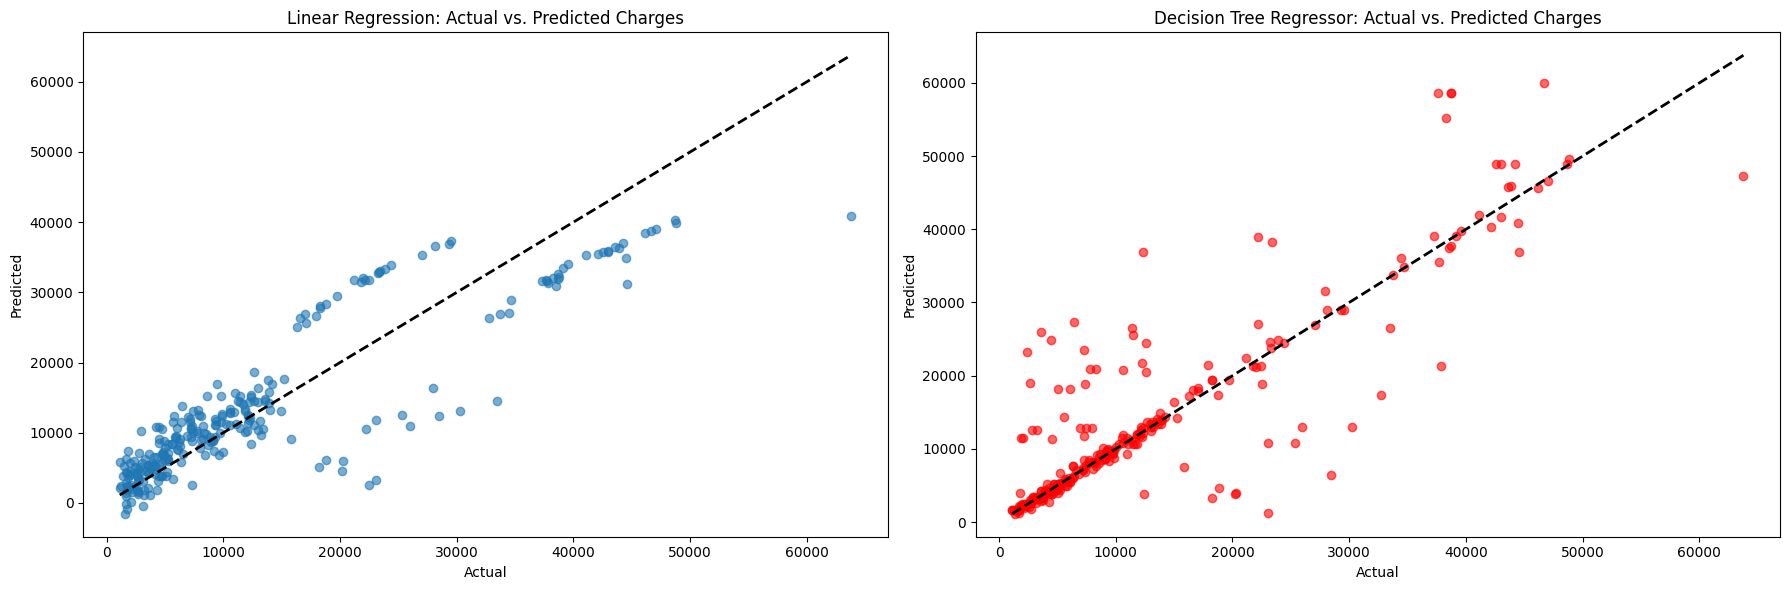

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for actual vs predicted values
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs. Predicted Charges')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree Regressor: Actual vs. Predicted Charges')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

The scatter plots for the Linear Regression and Decision Tree Regressor models show the actual vs. predicted insurance charges:

* In both plots, the dashed line represents the ideal scenario where the predicted values match the actual values perfectly.

* The Linear Regression plot demonstrates a fairly strong linear relationship between the actual and predicted values, with predictions generally clustering around the ideal line, especially for lower charges.

* The Decision Tree Regressor plot shows a bit more scatter, especially for higher charge values, indicating that while the model captures the general trend, it has some variance in its predictions, particularly for higher insurance charges.

##6. Real-world Implications
The ability to accurately predict insurance charges has significant implications:

* Insurance Companies can utilize these models for pricing policies more effectively, considering individual risk factors.
* Policyholders can benefit from transparent and fair pricing of insurance premiums.
* Healthcare Policy Makers might use these insights to address factors contributing to high medical costs, promoting preventative measures and healthy lifestyles.

##7. Reflection
Handling outliers presented a challenge, as their presence could significantly impact model performance. The decision to retain them was based on their potential real-world relevance to healthcare costs.

The choice between models highlighted the trade-off between simplicity and capturing complex patterns. Linear Regression offered a good balance for our objective, being easier to interpret and implement.

##8. Conclusion
This project demonstrated the effectiveness of regression analysis in predicting health insurance charges. The Linear Regression model, in particular, provided a strong balance of simplicity and predictive power, making it an excellent tool for analyzing and predicting insurance costs.



#PART 2: CLASSIFICATION

##1. Dataset Selection and Objective Definition

##1.1. Dataset Selection

**Credit Card Fraud Detection Dataset from Kaggle**

For the classification task within this project, I've selected a highly pertinent dataset focusing on credit card fraud detection. This dataset is composed of transactions made by European cardholders during September 2013. Among a total of 284,807 transactions, 492 are flagged as fraudulent, representing a mere 0.172% of the dataset. Such a distribution underscores the highly unbalanced nature of the dataset, a common challenge in fraud detection tasks.

The dataset predominantly consists of numerical input variables, which are the result of Principal Component Analysis (PCA) transformation. Due to confidentiality reasons, the original features and more detailed background information about the data are not disclosed. As a result, the dataset features labeled V1 through V28 are principal components obtained via PCA, which means they are transformed variables that no longer hold a direct interpretation in their original form.

Besides the PCA-transformed features, the dataset includes two untransformed features: 'Time' and 'Amount'. The 'Time' feature denotes the seconds elapsed between each transaction and the first transaction in the dataset. This could potentially be used to identify patterns in transaction activity over time. The 'Amount' feature represents the transaction amount, which can be crucial for identifying transactions that deviate significantly from a cardholder's typical spending pattern.

The target variable, 'Class', indicates whether a transaction is fraudulent (1) or not (0), serving as the foundation for our classification task. Given the highly imbalanced nature of this dataset, special attention will be required in preprocessing steps, model selection, and evaluation metrics to effectively detect fraudulent transactions while minimizing the false positive rate. This dataset offers a compelling opportunity to apply and evaluate machine learning techniques in a real-world problem of significant importance—the detection of fraudulent transactions to enhance financial security.


##1.2. Objective

To classify transactions as fraudulent (1) or not fraudulent (0) using the PCA-transformed features and any other available features like Time and Amount.

##2. Data Preprocessing

###2.1. Loading the Dataset and Initial Preprocessing

Given the PCA-transformed features, extensive preprocessing might not be necessary for feature transformation. However, we will:

* Scale the 'Time' and 'Amount' features since they are not transformed by PCA.
* Handle the imbalanced dataset. We'll explore techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjust class weights to mitigate the imbalance issue.

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
credit_df = pd.read_csv('creditcard.csv')

In [19]:
# Scaling 'Time' and 'Amount' features
scaler = StandardScaler()
credit_df['scaled_amount'] = scaler.fit_transform(credit_df[['Amount']])
credit_df['scaled_time'] = scaler.fit_transform(credit_df[['Time']])

# Drop the original 'Time' and 'Amount' features
credit_df.drop(['Time', 'Amount'], axis=1, inplace=True)

credit_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


##2.2. Addressing the Imbalance

The dataset's significant class imbalance requires special attention. Here, we can use SMOTE (Synthetic Minority Over-sampling Technique) to oversample the minority class, making the dataset more balanced.


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


##3. Model Implementation and Evaluation

After balancing the dataset, we will now train the models. Starting with Logistic Regression as a baseline model is common, and then I will also explore more complex models like Random Forest for potentially better performance.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_res, y_train_res)
predictions_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression - Classification Report")
print(classification_report(y_test, predictions_log_reg))

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)
predictions_rfc = rfc.predict(X_test)

# Evaluation
print("Random Forest - Classification Report")
print(classification_report(y_test, predictions_rfc))

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



##4. Model Evaluation Interpretation

**Logistic Regression Results Analysis**

*High Recall for Frauds (1)*
With a recall of 0.93, the Logistic Regression model is very good at identifying fraudulent transactions. However, this comes at the cost of a very low precision (0.06), indicating a high number of false positives—legitimate transactions wrongly classified as fraud.

*F1-Score for Frauds*
The low F1-score (0.11) for fraudulent transactions indicates an imbalance between precision and recall, heavily skewed towards recall.

*Overall Accuracy*
While the overall accuracy is high (97%), this metric is less informative in imbalanced datasets where the focus is on the performance metrics for the minority class.

**Random Forest Results Analysis**

*Improved Precision and Recall for Frauds (1)*

The Random Forest model significantly improves precision (0.91) while maintaining a high recall (0.85) for fraudulent transactions. This balance is crucial for practical fraud detection systems, as it reduces the number of false alarms (false positives) without substantially sacrificing the ability to detect actual fraud.

*High F1-Score for Frauds*

The F1-score of 0.88 for fraudulent transactions reflects a well-balanced model that is both precise and sensitive. This balance is critical in fraud detection, where both identifying actual frauds and reducing false alarms are important.

*Overall Accuracy*

The Random Forest model achieves near-perfect overall accuracy (100%), but more importantly, it demonstrates excellent performance in identifying fraudulent transactions with high precision and recall.

**Implications and Considerations**

*Random Forest's Superior Performance*

The Random Forest classifier outperforms Logistic Regression in this context, offering a more balanced approach to fraud detection. Its high precision for fraudulent transactions means fewer false positives, reducing the operational burden of investigating flagged transactions.

*Operational Efficiency*

High precision and recall for detecting frauds are essential for maintaining operational efficiency and customer trust. Random Forest's performance suggests it would result in fewer customer disruptions and more effective allocation of investigative resources.

*Model Complexity and Interpretability*

While Random Forest provides better results, it's also more complex and less interpretable than Logistic Regression. This trade-off between performance and interpretability is a common consideration in machine learning applications.

##5. Results Interpretation and Visualization


To visualize these results, we can create comparison plots for precision, recall, and F1-scores for both models and use ROC curves to compare their overall performance.

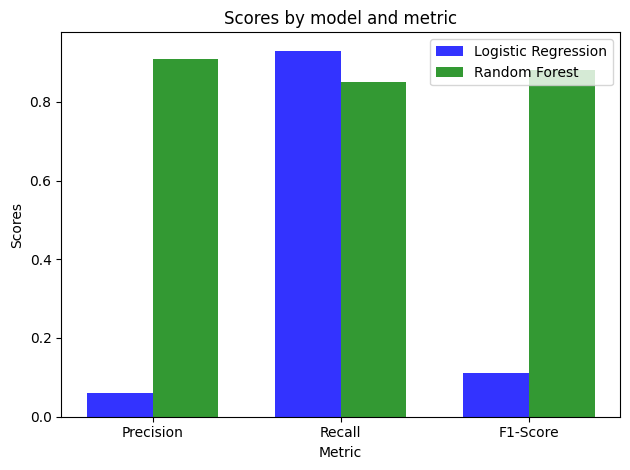

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
n_groups = 3
log_reg_scores = (0.06, 0.93, 0.11)  # Precision, Recall, F1-Score for Class 1 from Logistic Regression
rf_scores = (0.91, 0.85, 0.88)  # Precision, Recall, F1-Score for Class 1 from Random Forest

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, log_reg_scores, bar_width,
alpha=opacity,
color='b',
label='Logistic Regression')

rects2 = plt.bar(index + bar_width, rf_scores, bar_width,
alpha=opacity,
color='g',
label='Random Forest')

plt.xlabel('Metric')
plt.ylabel('Scores')
plt.title('Scores by model and metric')
plt.xticks(index + bar_width / 2, ('Precision', 'Recall', 'F1-Score'))
plt.legend()

plt.tight_layout()
plt.show()

This clearly demonstrates the distinct performance characteristics of the two models:

* Precision: Random Forest shows a much higher precision than Logistic Regression, indicating it is far better at correctly identifying the positive class (fraudulent transactions) without as many false positives.

* Recall: Both models achieve high recall, but Logistic Regression has a slightly higher recall, suggesting it is slightly more sensitive to detecting fraudulent transactions but at the cost of a much higher false positive rate.

* F1-Score: The Random Forest's F1-score is significantly higher than that of Logistic Regression, reflecting a better balance between precision and recall. This suggests that while Logistic Regression is aggressive in flagging fraud, leading to many false alarms, Random Forest provides a more reliable identification of fraudulent transactions.

In summary, the Random Forest model outperforms Logistic Regression on this imbalanced dataset, particularly in the precision metric, which is crucial for minimizing false positives in fraud detection scenarios. The F1-score also highlights Random Forest's superior overall performance in terms of accuracy and balance. This visualization effectively communicates the differences in model performance, supporting the decision-making process in choosing the appropriate model for deployment.

*ROC Curve Comparison*

To compare the models' overall performance, plotting ROC curves and comparing their AUC scores would be beneficial. This requires calculating the true positive rates and false positive rates for a range of thresholds.

In [25]:
predictions_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
predictions_rfc_proba = rfc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

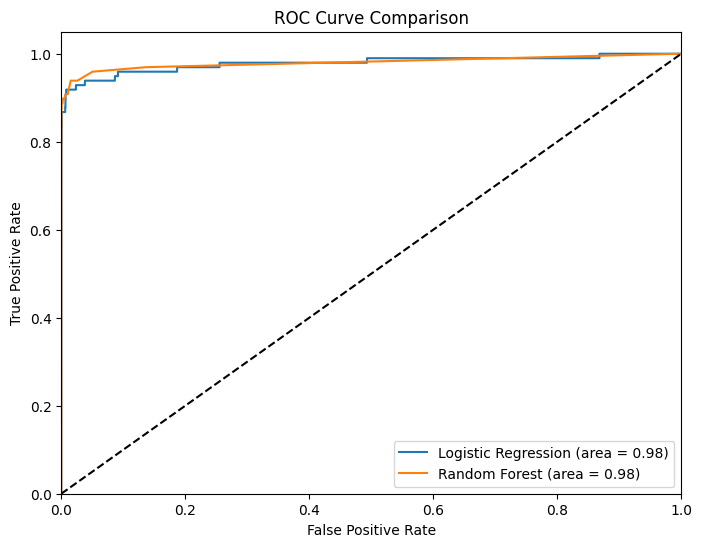

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, predictions_log_reg_proba)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, predictions_rfc_proba)

roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (area = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

Both curves are very close to the upper left corner of the plot, indicating excellent performance. This is also confirmed by the Area Under the Curve (AUC) scores for both models, which are equal to 0.98.

Here are some key points for interpretation:

* True Positive Rate (Sensitivity): Both models have a high TPR, suggesting that they are both effective at identifying fraudulent transactions.

* False Positive Rate (1 - Specificity): The FPR for both models is low, as indicated by the curves staying towards the left-hand side of the plot, meaning that there are relatively few false positives compared to the number of true negatives.

* AUC Score: The AUC score is a single scalar value that summarizes the overall performance of a classifier. An AUC score of 0.98 out of 1 indicates a very high level of discrimination ability. It's rare for two models to achieve the same AUC score, which suggests that they are almost equally effective at distinguishing between the two classes across all thresholds.

**Visualization Observations**

The overlap of the ROC curves for Logistic Regression and Random Forest means that, in terms of ROC and AUC, both models perform similarly well. This might be somewhat unexpected given the large difference in precision and recall reported earlier, especially the low precision of Logistic Regression.

In practice, given the imbalanced nature of the dataset, a Precision-Recall curve might be more informative. It directly relates to the model's ability to detect the positive class (fraud) and would likely show a bigger difference between the two models.

In summary, while the ROC curve comparison suggests both models are performing exceptionally well, other metrics like precision, recall, and the F1-score have shown that the Random Forest model is more balanced in terms of both identifying frauds and minimizing false alarms. This context is crucial for choosing the right model for practical deployment, where the costs of false positives and negatives can be significant.

##6. Real-world Implications

In a real-world context, especially for credit card fraud detection, the implications of these results are significant:

*Operational Efficiency*

* Both models demonstrate high discrimination capabilities, which is essential for operational efficiency in fraud detection systems. They can correctly identify a high number of fraudulent transactions while keeping false positives low (as suggested by high AUC scores).
* However, the practical deployment would favor the Random Forest model due to its higher precision, reducing the number of false positives, which can be costly and resource-intensive to investigate.

*Customer Trust and Experience*

* High precision in fraud detection ensures that legitimate customer transactions are less likely to be incorrectly flagged as fraud, minimizing disruptions to customer experience and maintaining trust.
* Recurrent false alarms can lead to customer dissatisfaction. Therefore, the balance of high precision and recall is crucial.

*Financial Implications*

* Effective fraud detection models like these can save substantial amounts of money by preventing fraudulent transactions and reducing the need for remediation after fraud occurs.
* Investment in advanced analytics and machine learning models could result in significant cost savings over less sophisticated fraud detection systems.

*Scalability*

* Models with high AUC scores are generally considered robust and may scale well with increasing data volume without a loss of performance.
* The ability to maintain performance with increased transaction volumes is critical for systems that need to adapt to growing amounts of data over time.

*Legal and Compliance*
* Financial institutions are often subject to strict regulations regarding fraud detection and prevention. The use of effective machine learning models can help in meeting regulatory requirements and avoiding penalties.

*Risk Management*

* By accurately classifying and predicting fraudulent activities, the bank can manage risk more effectively, adjust their fraud detection strategies, and allocate resources where they are needed most.

##7. Reflection

Reflecting on this credit card fraud detection exercise reveals several key insights and learning points:

*Challenges Faced*

One challenge was the highly technical nature of the models and the methods required to properly evaluate them. Conveying the results and their implications to stakeholders who may not have a technical background would require clear and effective communication, emphasizing the business impact rather than the technical details.


*Importance of Handling Imbalanced Data*

The nature of fraud detection problems often leads to imbalanced datasets since fraudulent transactions are relatively rare. This project underscored the importance of using appropriate metrics and balancing techniques. It demonstrated that conventional metrics like accuracy are not sufficient in such scenarios and that methods like precision, recall, and the F1-score, along with ROC-AUC, are far more informative.

*Choice of Model*

The difference in performance between Logistic Regression and Random Forest highlighted the impact of model selection. While Logistic Regression provided a strong baseline, Random Forest's ensemble approach improved precision without sacrificing recall substantially. This project served as a reminder that more complex models can offer substantial benefits, especially in terms of managing the trade-offs between different types of errors.

*Model Evaluation Beyond AUC*

The ROC curves for both models exhibited high AUC values, but the detailed classification reports revealed critical differences in performance. This serves as a valuable lesson that while summary statistics are useful, a deeper dive into the results is necessary to fully understand a model's strengths and weaknesses, especially in the context of real-world applications.

*Real-World Implications and Cost Considerations*

The practical aspects of deploying these models in a real business context led to discussions about operational efficiency, customer experience, financial implications, and compliance. It's clear that the benefits of an effective model extend beyond technical performance, affecting many facets of a business's operations.

*Insights Gained*

This project provided insights into the nature of fraud detection as a domain where false negatives (missed frauds) and false positives (legitimate transactions marked as fraud) carry different weights and implications. Balancing sensitivity and specificity is not just a statistical exercise but a business decision that can impact customer trust and a company's bottom line.

*Future Directions*
Future directions might include exploring additional models such as neural networks or gradient boosting machines, experimenting with different feature engineering techniques, or applying cost-sensitive learning to directly incorporate the financial implications of misclassifications into the training process.

##8. Conclusion

The project was a comprehensive exercise in applying machine learning to an important and challenging real-world problem. It showcased the necessity of thoughtful model selection, the subtleties of performance metrics in imbalanced contexts, and the broader impact of data science in the commercial and regulatory landscape.